# 1. Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

# 2. Adquisición de los datos

Leeremos el data frame de Airbnb

In [2]:
df = pd.read_csv('airbnb-listings.csv', sep=';', decimal='.')

In [3]:
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,15141125,https://www.airbnb.com/rooms/15141125,20170407214119,2017-04-08,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",It's a bright and cosy studio located in the h...,"Charming bright and cosy studio in ""El Rastro""...",none,The studio is located in the remarkable neighb...,...,10.0,10.0,10.0,NaN,NaN,moderate,2.0,5.11,"40.40745268477803,-3.7079954754432634","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,9470166,https://www.airbnb.com/rooms/9470166,20170407214119,2017-04-08,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable...",Quiet and comfortable space where you can rela...,"In the center, recently remodeled, comfortable...",none,It belongs to the district center of Madrid wh...,...,9.0,9.0,8.0,NaN,NaN,strict,13.0,5.88,"40.40831556101927,-3.705006385704201","Host Has Profile Pic,Host Identity Verified,Re..."
2,17444981,https://www.airbnb.com/rooms/17444981,20170407214119,2017-04-08,Cosy Apartment SOL/LA LATINA,Nice apartment near Sol and La Latina. Perfect...,Is a really cosy apartment with the best locat...,Nice apartment near Sol and La Latina. Perfect...,none,"La Latina is well known by El Rastro, the most...",...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,6.18,"40.413722014584295,-3.7068231186536718","Host Has Profile Pic,Host Identity Verified,Re..."
3,3284565,https://www.airbnb.com/rooms/3284565,20170407214119,2017-04-08,Alquiler Estudio Nuevo Madrid,"Alquilo estudio en el centro de Madrid , total...",NaN,"Alquilo estudio en el centro de Madrid , total...",none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,3.0,0.19,"40.411263372718054,-3.6973054373712886","Host Has Profile Pic,Host Identity Verified,Is..."
4,499911,https://www.airbnb.com/rooms/499911,20170407214119,2017-04-08,2 bedroom apartment downtown Madrid,NaN,Bright and airy apartment in Central Madrid re...,Bright and airy apartment in Central Madrid re...,none,NaN,...,10.0,10.0,10.0,NaN,NaN,strict,1.0,1.39,"40.41255625665078,-3.701155364799422","Host Is Superhost,Host Has Profile Pic,Host Id..."


Miraremos de que tipo son las variables que tenemos en el DF

In [4]:
df.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

Observamos que hay muhcos tipos de variables por lo que deberemos seleccionar las que vamos a utilizar y eliminar las que no sean relevantes. Calcularemos la longuitud de nuestro DF.

In [5]:
print(f'El data frame tiene un total de', df.shape[0], f'para un total de', df.shape[1], f'columnas de filtros')

El data frame tiene un total de 14780 para un total de 89 columnas de filtros


Utilizaremos el data frame para observar los distintos datos de las columnas

In [6]:
df.head().T


,0,1,2,3,4
ID,15141125,9470166,17444981,3284565,499911
Listing Url,https://www.airbnb.com/rooms/15141125,https://www.airbnb.com/rooms/9470166,https://www.airbnb.com/rooms/17444981,https://www.airbnb.com/rooms/3284565,https://www.airbnb.com/rooms/499911
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Panoramic charming studio!,Comfortable penthouse in the center,Cosy Apartment SOL/LA LATINA,Alquiler Estudio Nuevo Madrid,2 bedroom apartment downtown Madrid
...,...,...,...,...,...
Cancellation Policy,moderate,strict,moderate,strict,strict
Calculated host listings count,2.0,13.0,1.0,3.0,1.0
Reviews per Month,5.11,5.88,6.18,0.19,1.39
Geolocation,"40.40745268477803,-3.7079954754432634","40.40831556101927,-3.705006385704201","40.413722014584295,-3.7068231186536718","40.411263372718054,-3.6973054373712886","40.41255625665078,-3.701155364799422"


Observamos que hay muchas variables irrelevantes para nuestro estudio las cuales procederemos a eliminar.

In [7]:
delate= ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Thumbnail Url', 'Medium Url', 
    'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Weekly Price', 
    'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 
    'Last Review', 'Reviews per Month', 'Geolocation', 'Calculated host listings count',
    'Host Listings Count', 'Host Total Listings Count','Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
    'Host Location', 'Host About']

df.drop(delate, axis=1, inplace=True)

In [8]:
print(f'Observamos que tras eliminar las columnas que no son utiles en nuestro projecto nos quedarán un total de', df.shape[1], f'columnas')

Observamos que tras eliminar las columnas que no son utiles en nuestro projecto nos quedarán un total de 56 columnas


In [9]:
df.head()

,Name,Summary,Space,Description,Experiences Offered,Host Since,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Verifications,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Features
0,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",It's a bright and cosy studio located in the h...,"Charming bright and cosy studio in ""El Rastro""...",none,2016-09-20,within an hour,100.0,NaN,"email,phone,facebook,reviews,jumio,government_id",...,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,"Host Is Superhost,Host Has Profile Pic,Host Id..."
1,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable...",Quiet and comfortable space where you can rela...,"In the center, recently remodeled, comfortable...",none,2013-11-08,within an hour,100.0,NaN,"email,phone,reviews,jumio",...,8.0,8.0,9.0,9.0,9.0,8.0,NaN,NaN,strict,"Host Has Profile Pic,Host Identity Verified,Re..."
2,Cosy Apartment SOL/LA LATINA,Nice apartment near Sol and La Latina. Perfect...,Is a really cosy apartment with the best locat...,Nice apartment near Sol and La Latina. Perfect...,none,2017-02-25,within an hour,100.0,NaN,"email,phone,facebook,reviews,jumio,offline_gov...",...,9.0,10.0,9.0,10.0,10.0,10.0,NaN,NaN,moderate,"Host Has Profile Pic,Host Identity Verified,Re..."
3,Alquiler Estudio Nuevo Madrid,"Alquilo estudio en el centro de Madrid , total...",NaN,"Alquilo estudio en el centro de Madrid , total...",none,2012-03-09,within a few hours,100.0,NaN,"email,phone,reviews,jumio,government_id",...,9.0,9.0,10.0,10.0,9.0,9.0,NaN,NaN,strict,"Host Has Profile Pic,Host Identity Verified,Is..."
4,2 bedroom apartment downtown Madrid,NaN,Bright and airy apartment in Central Madrid re...,Bright and airy apartment in Central Madrid re...,none,2012-05-26,within an hour,100.0,NaN,"email,phone,facebook,reviews,jumio",...,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,strict,"Host Is Superhost,Host Has Profile Pic,Host Id..."


Observamos los datos que nos quedan después de esta limpieza

In [10]:
df.apply(lambda x: len(x.unique()))

Name                            14376
Summary                         13290
Space                           10175
Description                     14282
Experiences Offered                 5
Host Since                       2117
Host Response Time                  5
Host Response Rate                 71
Host Acceptance Rate               13
Host Verifications                207
Street                           1646
Neighbourhood                     391
Neighbourhood Cleansed            478
Neighbourhood Group Cleansed       50
City                              247
State                             103
Zipcode                           620
Market                             44
Smart Location                    257
Country Code                       18
Country                            18
Latitude                        14780
Longitude                       14780
Property Type                      22
Room Type                           3
Accommodates                       16
Bathrooms   

Observamos que tenemos muchas variables que hacen referencia a la ciudad. Estas son:   
    -Street                     
    -City                            
    -State                             
    -Zipcode                 
    -Smart Location                     
    -Market            
Decidimos quedarons sólo con una de estas variables ya que muchas son muy similares o iguales y nos aportan mucha información extra. La única con la que nos quedaremos porque es la mas relevante será la de City y Neighbourhood
   

In [11]:
delate2= ['State','Zipcode','Smart Location','Market', 'Street']

df.drop(delate2, axis=1, inplace=True)

Observaremos los valores nullos que tenemos en las distintas columnas para ver si podemos eliminar alguna de estas por no ser relevante o tener pocos datos.

In [12]:
df.isnull().any()


Name                             True
Summary                          True
Space                            True
Description                      True
Experiences Offered             False
Host Since                       True
Host Response Time               True
Host Response Rate               True
Host Acceptance Rate             True
Host Verifications               True
Neighbourhood                    True
Neighbourhood Cleansed          False
Neighbourhood Group Cleansed     True
City                             True
Country Code                    False
Country                          True
Latitude                        False
Longitude                       False
Property Type                   False
Room Type                       False
Accommodates                    False
Bathrooms                        True
Bedrooms                         True
Beds                             True
Bed Type                        False
Amenities                        True
Square Feet 

Observamos que hay muchas columnas con datos nullos. Eliminaremos aquellas que tengas mas y que por tanto no nos sean relevantes en nuestro estudio.

In [13]:
#Calculamos cuantos valores nulos tienen las diferentes columnas 
len(df) - df.count()

Name                                1
Summary                           591
Space                            3892
Description                         6
Experiences Offered                 0
Host Since                          3
Host Response Time               1899
Host Response Rate               1899
Host Acceptance Rate            14741
Host Verifications                  6
Neighbourhood                    5229
Neighbourhood Cleansed              0
Neighbourhood Group Cleansed     1020
City                                6
Country Code                        0
Country                             1
Latitude                            0
Longitude                           0
Property Type                       0
Room Type                           0
Accommodates                        0
Bathrooms                          55
Bedrooms                           25
Beds                               49
Bed Type                            0
Amenities                         170
Square Feet 

In [14]:
print(f' Teniendo un total de', df.shape[0], f'datos. Observamos que Jurisdiction Names, License, Has Availability, Square Feet, Host Acceptance Rate tiene nulas practicamente todas sus entradas. Por lo tanto procederemos a eliminar estas columnas')

 Teniendo un total de 14780 datos. Observamos que Jurisdiction Names, License, Has Availability, Square Feet, Host Acceptance Rate tiene nulas practicamente todas sus entradas. Por lo tanto procederemos a eliminar estas columnas


In [15]:
delate3= ['Jurisdiction Names', 'License', 'Has Availability', 'Square Feet', 'Host Acceptance Rate']

df.drop(delate3, axis=1, inplace=True)

In [16]:
print(f'Tras la limpieza de variables nos quedamos con un total de', df.shape[1], f'columnas')

Tras la limpieza de variables nos quedamos con un total de 46 columnas


# 3. Análisis exploratorio

Lo primero que realizaremos será dividir nuestro dataset en training y test. Tras esto, trabajaremos únicamente con el de training.

In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=0)

#Guardaremos los dos data sets en distintos csv 
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)



In [18]:
#CARGAMOS EL DATASET DE TRAIN QUE ES CON LE QUE TRABAJAREMOS AHORA
df_train =pd.read_csv('./train.csv', sep=';', decimal='.')

Vamos a buscar las variables que no sean redundantes con el modelo para tratar de eliminarlas. Para ello calcularemos la correlación de estas.

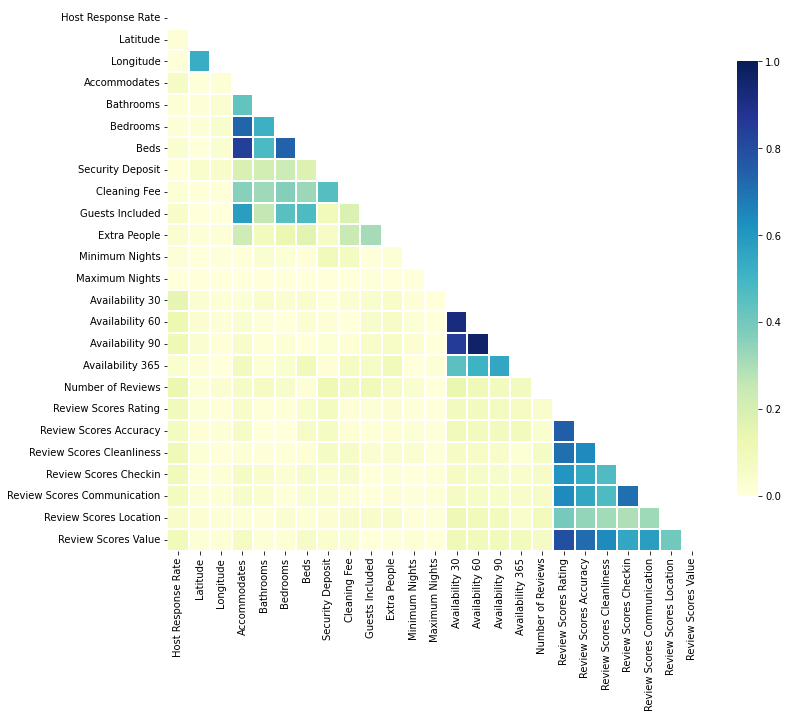

In [19]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_train.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Observamos que hay mucha correlación entre las variables de Reviews y Avaliability. Decidimos eliminar todas las de avaliability menos la de 365 ya que es que menos correlación tiene con el resto. Respecto a las Reviews decidimos quedaron con una, la escogida será la de Review Score Rating.

Además observamos una gran correlación entre Beds y Accommodates, procederemos a eliminar a Accomodates.

In [20]:
delate4= ['Availability 30', 'Availability 60','Availability 90','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin', 'Review Scores Communication','Review Scores Location', 'Review Scores Value','Accommodates']

df_train.drop(delate4, axis=1, inplace=True)

Volvemos a representar la correlación de las variables para observar el cambio.

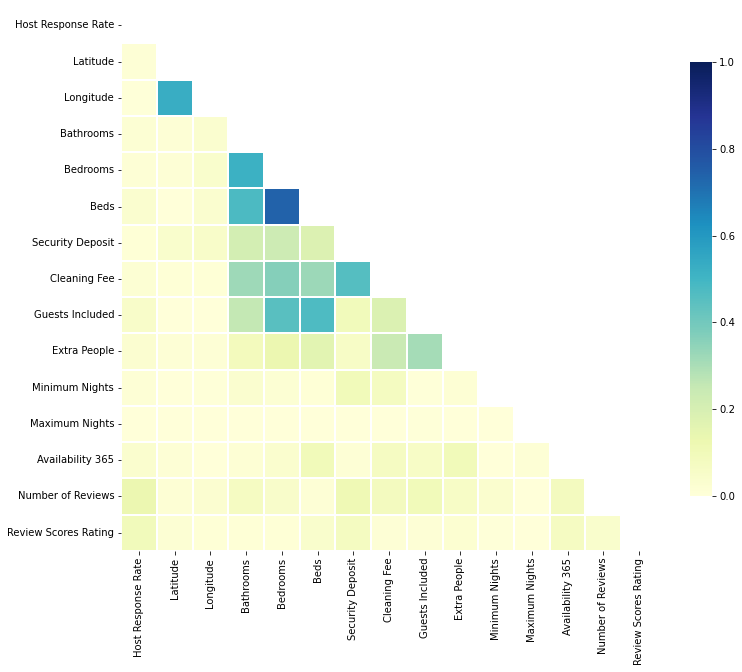

In [21]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_train.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Podemos observar que el resultado mejora correcamente aunque aun tenemos correlación con algunas variables, como podría ser Beds y Bedrooms.

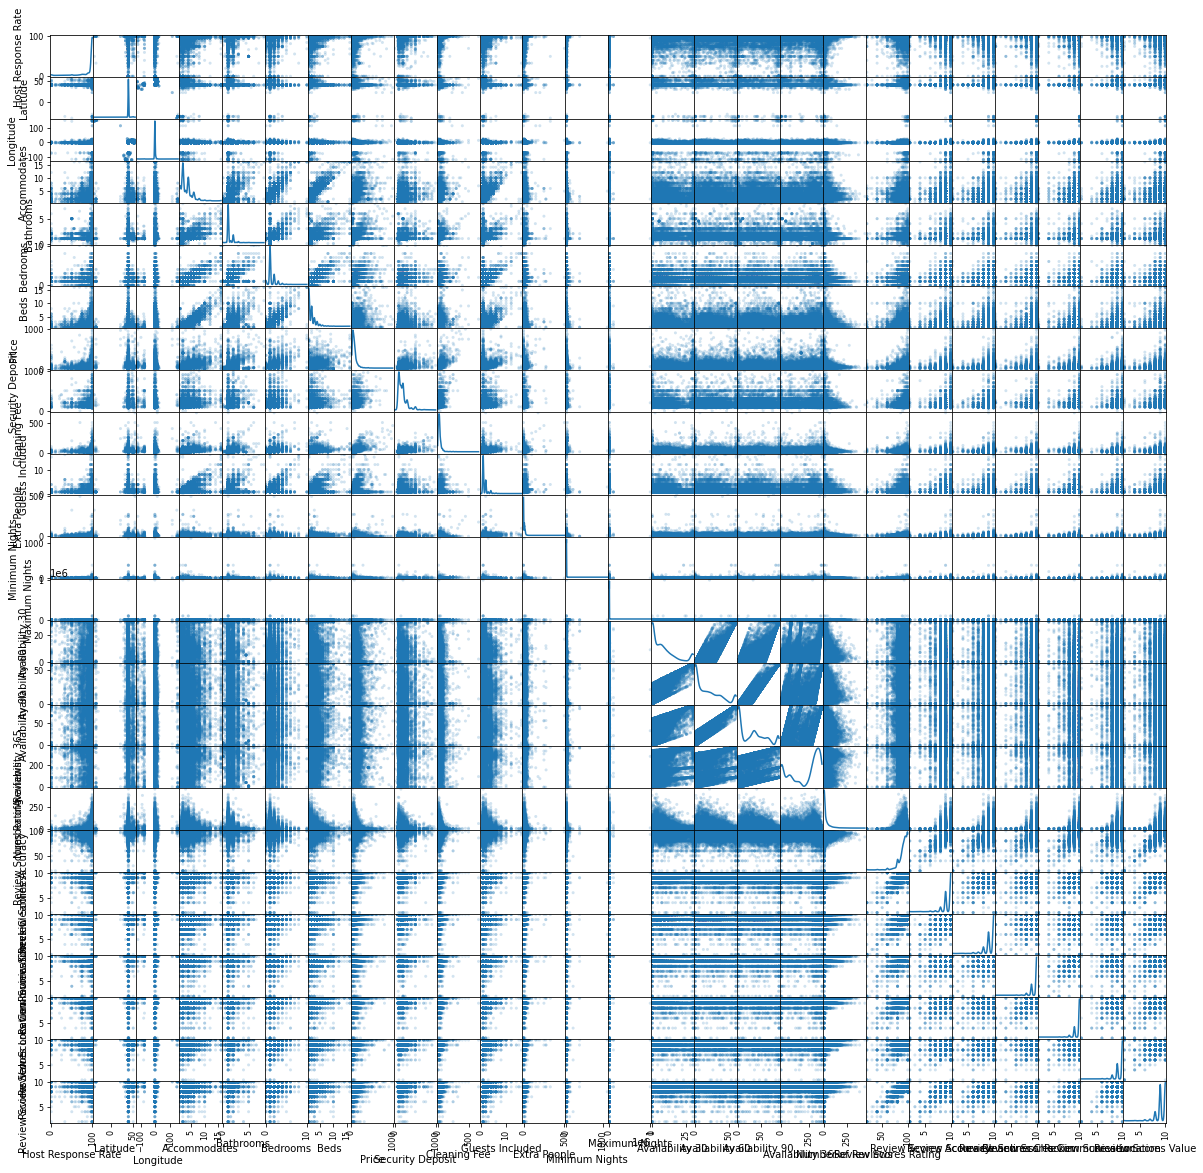

In [22]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

Antes de finalizar, vamos a observar los precios a través de su gráfica para ver si observamos outliers.

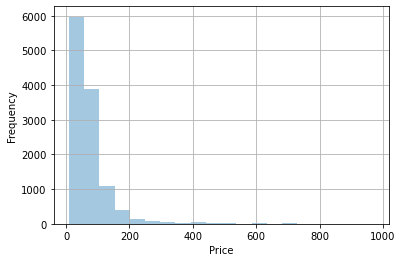

In [23]:
df_train['Price'].plot.hist(alpha=0.4, bins=20, grid = True)
plt.xlabel('Price')

plt.show()

Segun el filtro a partir de los 200€ encontramos muy pocos precios y por lo tanto datos que serán outliers. Vamos acomprobar cuantos son estos datos para ver si los podemos eliminar sin que afecte significativamente a nuestro modelo.

In [24]:
print(f' De todos los valores de nuestro DF observamos',len(df_train[df_train['Price']>200]), f'valores por encima de los 200€')
print(f'De los', len(df_train), f'valores que tenemos en nuestro df, observamos que',len(df_train[df_train['Price']>200]), f'están por encima de los 200€. Esto quiere decir un',      (len(df_train[df_train['Price']>200])/len(df_train)*100), f'%')

 De todos los valores de nuestro DF observamos 465 valores por encima de los 200€
De los 11824 valores que tenemos en nuestro df, observamos que 465 están por encima de los 200€. Esto quiere decir un 3.9326792963464143 %


Cómo el porcentaje de datos es insignificante para nuestro modelo procederemos a eliminar aquellos valores por encima de los 200€. Para ello filtaremos los datos.

In [25]:
df_train = df_train[df_train['Price']<200]

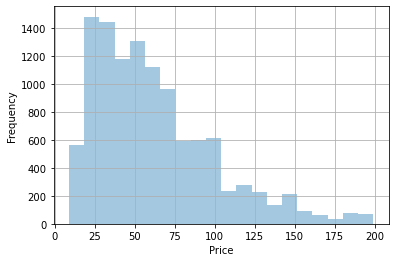

In [26]:
df_train['Price'].plot.hist(alpha=0.4, bins=20, grid = True)
plt.xlabel('Price')

plt.show()

# 4.Generación de características a partir de las existentes

Observaremos las distintas variables que nos quedan para ver si podemos generar nuevas variables a partir de las ya exitentes.

In [27]:
df_train.dtypes

Name                             object
Summary                          object
Space                            object
Description                      object
Experiences Offered              object
Host Since                       object
Host Response Time               object
Host Response Rate              float64
Host Verifications               object
Neighbourhood                    object
Neighbourhood Cleansed           object
Neighbourhood Group Cleansed     object
City                             object
Country Code                     object
Country                          object
Latitude                        float64
Longitude                       float64
Property Type                    object
Room Type                        object
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Bed Type                         object
Amenities                        object
Price                           float64


Encontramos tres variables de Neighbourhood, vamos a analizarlas.

In [28]:
df = df_train[['Neighbourhood Group Cleansed','Neighbourhood Cleansed','Neighbourhood']]
df.head(15)

,Neighbourhood Group Cleansed,Neighbourhood Cleansed,Neighbourhood
0,Tetuán,Cuatro Caminos,Cuatro Caminos
1,Ciutat Vella,el Barri Gòtic,El Gòtic
2,Centro,Embajadores,Embajadores
3,Latina,Puerta del Angel,Aluche
4,Pankow,Prenzlauer Berg Südwest,Prenzlauer Berg
5,Centro,Cortes,Cortes
6,Chamberí,Rios Rosas,Rios Rosas
8,Carabanchel,Comillas,Carabanchel
9,Centro,Embajadores,NaN
10,Moratalaz,Vinateros,Moratalaz


Observamos los valores na de cada columna y los distintos valores que tienen

In [29]:
#Valores na
len(df)-df.count()

Neighbourhood Group Cleansed     665
Neighbourhood Cleansed             0
Neighbourhood                   3975
dtype: int64

In [30]:
df.apply(lambda x: len(x.unique()))

Neighbourhood Group Cleansed     47
Neighbourhood Cleansed          414
Neighbourhood                   325
dtype: int64

Observamos que Neighbourhood Group Cleansed es más general que el resto de columnas. Por lo tanto nos quedaremos con esta varibale como general. Y en su defecto añadiremos Neighbourhood Cleansed.

In [31]:
df["Final Neighbourhood"] = df["Neighbourhood Group Cleansed"].fillna(df["Neighbourhood Cleansed"])

In [32]:
df_train["Final Neighbourhood"] = df['Neighbourhood Group Cleansed'].fillna(df['Neighbourhood Cleansed'])
df_train.drop(['Neighbourhood', 'Neighbourhood Group Cleansed','Neighbourhood Cleansed'], axis=1, inplace=True)

In [33]:
df_train.dtypes

Name                     object
Summary                  object
Space                    object
Description              object
Experiences Offered      object
Host Since               object
Host Response Time       object
Host Response Rate      float64
Host Verifications       object
City                     object
Country Code             object
Country                  object
Latitude                float64
Longitude               float64
Property Type            object
Room Type                object
Bathrooms               float64
Bedrooms                float64
Beds                    float64
Bed Type                 object
Amenities                object
Price                   float64
Security Deposit        float64
Cleaning Fee            float64
Guests Included           int64
Extra People              int64
Minimum Nights            int64
Maximum Nights            int64
Availability 365          int64
Number of Reviews         int64
Review Scores Rating    float64
Cancella

 Por último queremos transformar la varibale host since para saber directamente cuantos años lleva el dueño en la plataforma.

In [34]:
df_train['Host Since']

0        2016-02-23
1        2016-01-12
2        2014-05-19
3        2016-03-01
4        2012-12-06
            ...    
11819    2017-03-31
11820    2014-11-29
11821    2016-04-20
11822    2012-05-15
11823    2015-09-11
Name: Host Since, Length: 11279, dtype: object

In [35]:
df1 = df_train['Host Since']

In [37]:
#Observamos que sólo tenemos un valor na por lo que procederemos primero a eliminarlo
len(df1)-df1.count()

1

In [38]:
df_train.dropna(subset=['Host Since'], inplace=True) 

A continuación procedemos a pasar las fechas a años, para ello restaremos los años a 2017 (año más antiguo que aprece)

In [39]:
from datetime import datetime

df_train['Host Since'] = df_train['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
df_train['Years in Airbnb'] = df_train['Host Since'].apply(lambda x: 2017 - x.year)

df_train.drop(['Host Since'], axis=1, inplace=True)

# Comparativa de distintos algoritmos

# Selección y evaluación del modelo